In [0]:
第一次建立模型以及訓練使用CIFAR10資料集，進行transfer learning則是使用CIFAR100資料集
因為資料量足夠，使用fine-tune

修改處：
(1)在CIFAR100要訓練時，以之前訓練好的cnn配上修改過神經元數量的dense層，且多增加dense層
(2)最後將兩次訓練結果以折線圖呈現，發現CIFAR10的準確度會比CIFAR100要高出0.2

確認tensorflow版本、讀入套件 & datasets

In [0]:
%tensorflow_version 2.x

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.optimizers import SGD, Adam
#for CNN
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D
#for FNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
#for data preprocessing
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

data preprocessing: cifar10 dataset (50000筆32x32,並有3個channel)

In [3]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
name_list = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

170500096/170498071 [==============================] - 6s 0us/step


In [4]:
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


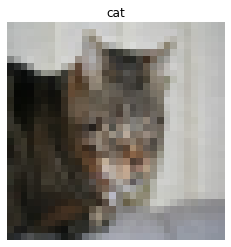

In [5]:
idx = np.random.randint(x_train.shape[0])
x_sample = x_train[idx]
y_sample = y_train[idx].squeeze()

plt.imshow(x_sample)
plt.title(name_list[y_sample])
plt.axis('off');

In [0]:
#normalization
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()
#one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

建立用來分類cifar10的神經網路

這裡建立經典的 CNN 模型 LeNet-5 的變形

LeNet-5 分成兩個部分，分別為卷積層與全連接層，兩部份之間是透過扁平層 (Flatten) ，將卷積層最後輸出的 2 維向量壓扁成 1 維向量

In [7]:
# 卷積層, convolutional block and pooling x3
CNN_layers = [Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', name='Conv_1'),
              MaxPool2D(),
              Conv2D(128, (3, 3), padding='same', activation='relu', name='Conv_2'),
              MaxPool2D(),
              Conv2D(512, (3, 3), padding='same', activation='relu', name='Conv_3'),
              GlobalAveragePooling2D()]
# 全連結層, Fully-connected layers as a classfier, Ouput layer: # of neurons = # of classes with softmax activation
FC_layers = [Dense(units=256, activation='relu'),
             Dense(units=10, activation='softmax')]
model_c10 = Sequential(CNN_layers+FC_layers)
model_c10.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 16, 16, 128)       36992     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 8, 8, 512)         590336    
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               1

In [0]:
model_c10.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['categorical_accuracy'])

training

In [9]:
history_c10 = model_c10.fit(x_train, y_train, batch_size=256, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
196/196 [==============================] - 6s 29ms/step - loss: 1.8658 - categorical_accuracy: 0.2978 - val_loss: 1.6145 - val_categorical_accuracy: 0.4019
Epoch 2/10
196/196 [==============================] - 5s 28ms/step - loss: 1.5707 - categorical_accuracy: 0.4218 - val_loss: 1.5072 - val_categorical_accuracy: 0.4488
Epoch 3/10
196/196 [==============================] - 5s 28ms/step - loss: 1.4206 - categorical_accuracy: 0.4816 - val_loss: 1.3660 - val_categorical_accuracy: 0.5008
Epoch 4/10
196/196 [==============================] - 5s 28ms/step - loss: 1.3009 - categorical_accuracy: 0.5290 - val_loss: 1.2498 - val_categorical_accuracy: 0.5428
Epoch 5/10
196/196 [==============================] - 5s 28ms/step - loss: 1.2061 - categorical_accuracy: 0.5655 - val_loss: 1.1833 - val_categorical_accuracy: 0.5670
Epoch 6/10
196/196 [==============================] - 5s 28ms/step - loss: 1.1515 - categorical_accuracy: 0.5877 - val_loss: 1.1343 - val_categorical_accuracy: 0.590

In [0]:
#save weights
model_c10.save_weights('cifar10.h5')

模型預測: 預測資料集的準確率

In [11]:
model_c10.load_weights('cifar10.h5')

score_train = model_c10.evaluate(x_train, y_train)
score_test = model_c10.evaluate(x_test, y_test)

print(f'Train Accuracy: {score_train[1]*100}')
print(f'Test Accuracy: {score_test[1]*100}')

313/313 [==============================] - 1s 3ms/step - loss: 0.9513 - categorical_accuracy: 0.6631
Train Accuracy: 67.84600019454956
Test Accuracy: 66.3100004196167


### **Transfer Learning**

data preprocessing: cifar100 dataset (50000筆32x32, 3 channel的圖片，但是有100個結果)


In [0]:
(x_train1, y_train1), (x_test1, y_test1) = datasets.cifar100.load_data()

In [23]:
print(x_train1.shape)
print(y_train1.shape)

(50000, 32, 32, 3)
(50000, 1)


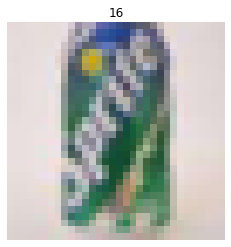

In [25]:
idx = np.random.randint(x_train1.shape[0])
x_sample = x_train1[idx]
y_sample = y_train1[idx].squeeze()

plt.imshow(x_sample)
plt.title(y_sample)
plt.axis('off');

In [0]:
#normalization
x_train1 = x_train1 / x_train1.max()
x_test1 = x_test1 / x_test1.max()
#one-hot encoding
y_train1 = to_categorical(y_train1, 100)
y_test1 = to_categorical(y_test1, 100)

先建改過輸出的dense層，再加上前面訓練好的神經網路

In [0]:
FC_layers_c100 = [Dense(units=512, activation='relu'),
                  Dense(units=256, activation='relu'),
                  Dense(units=100, activation='softmax')]

In [28]:
model_c100 = Sequential(CNN_layers+FC_layers_c100)
model_c100.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 16, 16, 128)       36992     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 8, 8, 512)         590336    
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)              

In [0]:
model_c100.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['categorical_accuracy'])

fine-tune

In [0]:
for layer in CNN_layers:
    layer.trainable = True

In [31]:
history_c100 = model_c100.fit(x_train1, y_train1, batch_size=256, epochs=10, validation_data=(x_test1, y_test1))

Epoch 1/10
196/196 [==============================] - 6s 29ms/step - loss: 3.6539 - categorical_accuracy: 0.1412 - val_loss: 3.2335 - val_categorical_accuracy: 0.2034
Epoch 2/10
196/196 [==============================] - 6s 28ms/step - loss: 3.0881 - categorical_accuracy: 0.2318 - val_loss: 3.0123 - val_categorical_accuracy: 0.2484
Epoch 3/10
196/196 [==============================] - 6s 28ms/step - loss: 2.8593 - categorical_accuracy: 0.2757 - val_loss: 2.7964 - val_categorical_accuracy: 0.2832
Epoch 4/10
196/196 [==============================] - 6s 28ms/step - loss: 2.6671 - categorical_accuracy: 0.3156 - val_loss: 2.6297 - val_categorical_accuracy: 0.3228
Epoch 5/10
196/196 [==============================] - 6s 28ms/step - loss: 2.5348 - categorical_accuracy: 0.3405 - val_loss: 2.5047 - val_categorical_accuracy: 0.3540
Epoch 6/10
196/196 [==============================] - 5s 28ms/step - loss: 2.4308 - categorical_accuracy: 0.3618 - val_loss: 2.6180 - val_categorical_accuracy: 0.329

模型預測: 預測資料集的準確率

In [32]:
score_train = model_c100.evaluate(x_train1, y_train1)
score_test = model_c100.evaluate(x_test1, y_test1)

print(f'Train Accuracy: {score_train[1]*100}')
print(f'Test Accuracy: {score_test[1]*100}')

313/313 [==============================] - 1s 4ms/step - loss: 2.1901 - categorical_accuracy: 0.4224
Train Accuracy: 46.58600091934204
Test Accuracy: 42.239999771118164


視覺比較

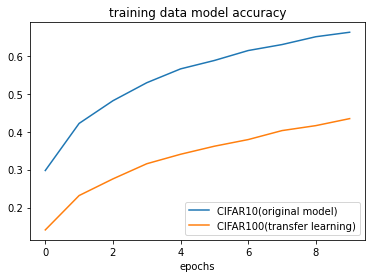

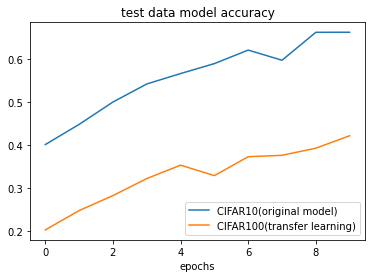

In [36]:
plt.plot(history_c10.history['categorical_accuracy'])
plt.plot(history_c100.history['categorical_accuracy'])
plt.title('training data model accuracy')
plt.xlabel('epochs')
plt.legend(['CIFAR10(original model)', 'CIFAR100(transfer learning)'], loc='lower right')
plt.show()
plt.plot(history_c10.history['val_categorical_accuracy'])
plt.plot(history_c100.history['val_categorical_accuracy'])
plt.title('test data model accuracy')
plt.xlabel('epochs')
plt.legend(['CIFAR10(original model)', 'CIFAR100(transfer learning)'], loc='lower right')
plt.show()